# Part II - (Presentation Title)
## by (Francis Kipkogei )


## Investigation Overview

**The overall goals of this project are as follows;**
- factors that affect a loan's outcome status,
- factors that affects the borrower's APR or interest rate,
- ascertaining if there are differences between loans depending on how large the original loan amount was?


## Dataset Overview

This databset utilized in this project is prosperLoan Data. The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
The dataset contains some missing values and also not all the the features are essential, some variables which can answer research questions would be selected for analysis. Quite a number of variables which were redundant and thus were ignored. Only few variables about 16 were selected since they were features of interest (could answer research questions). Also, some observations (rows) with missing values were dropped.

In [58]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [59]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

cols = ['Term', 'LoanStatus',  'BorrowerAPR', 'BorrowerRate','LenderYield', 'ListingCategory (numeric)',
        'EmploymentStatusDuration','IsBorrowerHomeowner', 'EmploymentStatus', 'StatedMonthlyIncome','IncomeRange',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount',
        'DelinquenciesLast7Years','MonthlyLoanPayment']
df_sub = df[cols]
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [60]:
#Making a copy of data
df_c=df_sub.copy()
df_c.dropna(inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)
### Univariate Exploration

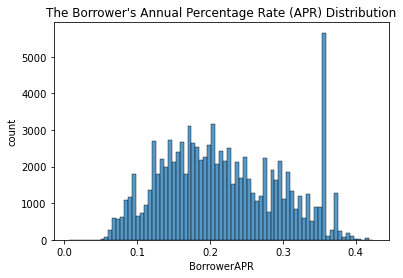

In [61]:
sb.histplot(df_c['BorrowerAPR'])
plt.ylabel('count')
plt.title("The Borrower's Annual Percentage Rate (APR) Distribution");

The BorrowerAPR distribution is a multimodal since it has atleast three peaks, the first smaller peak is observed between 0.0 & 0.1, then large peak at 0.2 and very high peak between 0.35 & 0.36, but above 0.4 BorrowerAPR the peak decreases. Thus BorrowerAPR is high between 0.35 & 0.36 and at around 0.2.

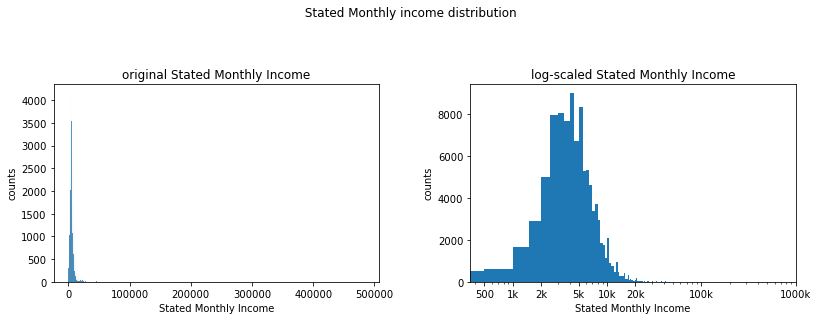

In [62]:
fig= plt.figure(figsize=[12,8])
a1=fig.add_subplot(2,2,1)
sb.histplot(df_c['StatedMonthlyIncome'])
plt.xlabel("Stated Monthly Income")
plt.ylabel('counts')
a1.set_title('original Stated Monthly Income')

# there's a long tail in the distribution, so let's put it on a log scale instead
a2=fig.add_subplot(2,2,2)
bins = np.arange(0,df_c['StatedMonthlyIncome'].max()+500,500)

plt.hist(data=df_c,x='StatedMonthlyIncome',bins=bins)
plt.xscale('log')
plt.xticks([500,1e3,2e3,5e3,1e4,2e4,1e5,1e6],['500','1k','2k','5k','10k','20k','100k','1000k'])
plt.xlabel("Stated Monthly Income")
plt.ylabel('counts')
a2.set_title('log-scaled Stated Monthly Income')
fig.suptitle(" Stated Monthly income distribution")
fig.tight_layout(pad=3.0);

The  Stated Monthly income in the original data has a right long-tailed distribution 'right skewed'.There is high level of skewness and the far outliers are also observed when Stated Monthly Income  is above 100,000 so, thus it would be significant to transform or perform log scaling to this feature and check if there is improvement or outliers. After performing log-scaling on Stated Monthly income variable some outliers were observed above than 20K.

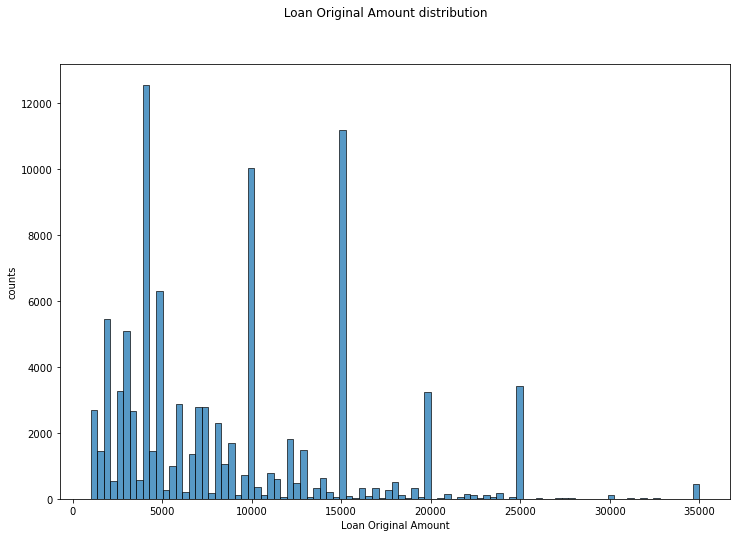

In [63]:
#Create a histogram to show the distribution of loan original amount
fig= plt.figure(figsize=[12,8])
# a1=fig.add_subplot(2,2,1)
sb.histplot(df_c['LoanOriginalAmount'])
plt.xlabel("Loan Original Amount")
plt.ylabel('counts')
fig.suptitle(" Loan Original Amount distribution");

The distribution of original loan amount is a multimodal with various peak variations. Moreover, outliers were above 25000 are observed,this depicts that few individuals were granted huge amount of loans as compared to those who were given lower especeially those who granted loan amount in range of 15000 and below.

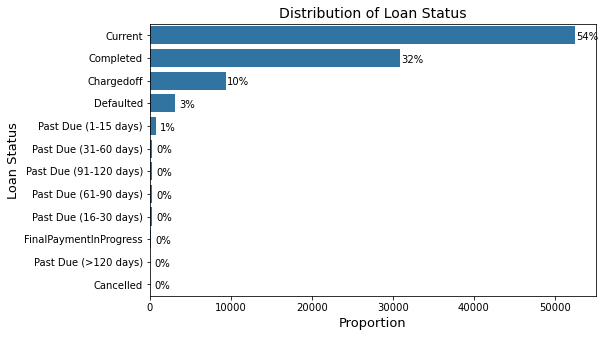

In [64]:
# Loan Status Distribution
status_order = df_c['LoanStatus'].value_counts().index
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data=df_c,y='LoanStatus',color=base_color,order=status_order);
plt.title('Distribution of Loan Status', fontsize=14)
plt.ylabel('Loan Status', fontsize=13)
plt.xlabel('Proportion', fontsize=13)

# add annotations
n_points = df_c.shape[0]
cat_counts = df_c['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');

The current status of the loan has largest proportion of loan status followed by those who have completed there are few cases loan defaulters.

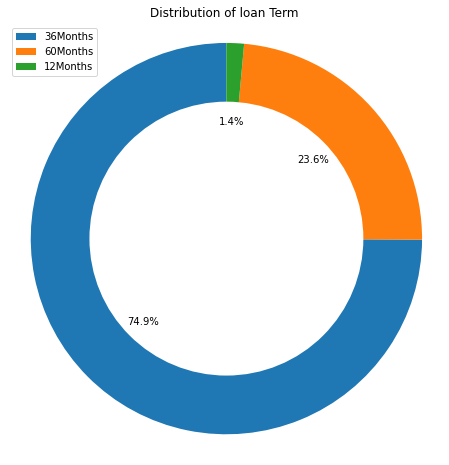

In [65]:
plt.figure(figsize=[8,8])
c = df_c.Term.value_counts()
labels = '36Months','60Months','12Months'
plt.pie(c, autopct='%1.1f%%', startangle=90)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Favourite Fruit Survey')
  

plt.title('Distribution of loan Term')
plt.axis('square')
plt.legend(labels);

Most of the individuals who took loan prefer 36 months plan on but few borrowers opted for 12 months term

## (Visualization 2)

### Bivariate Exploration

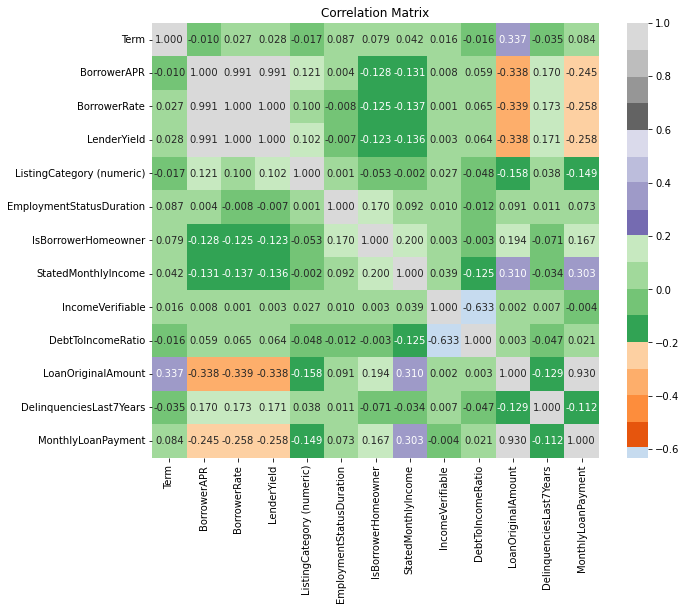

In [66]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [10, 8])
sb.heatmap(df_c.corr(), annot = True, fmt = '.3f',cmap = 'tab20c', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

There is high multicollinearity between LenderYield, BorrowerAPR and BorrowerRate.
It was observed that some factors that affect borrower's APR or interest rate are LoanOriginalAmount followed by MonthlyLoanPayment, DelinquenciesLast7Years, StatedMonthlyIncome,IsBorrowerHomeowner,ListingCategory

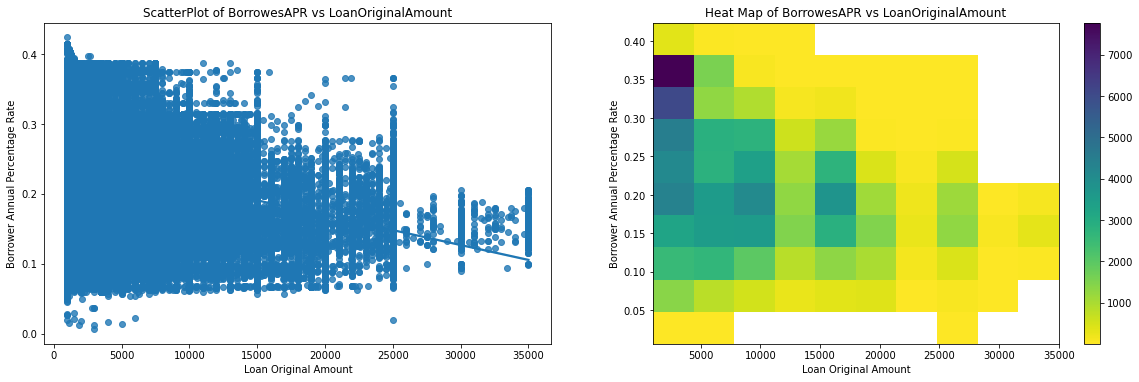

In [67]:
# Create a subplot for LoanOriginal Amount and Term
plt.figure(figsize=[20,13])

plt.subplot(2,2,1)
sb.regplot(data=df_c, y='BorrowerAPR', x='LoanOriginalAmount') #creating a scatter plot using seaborn
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Loan Original Amount')
plt.title('ScatterPlot of BorrowesAPR vs LoanOriginalAmount');

plt.subplot(2,2,2)
plt.hist2d(data=df_c,  y='BorrowerAPR', x='LoanOriginalAmount', cmap='viridis_r', cmin=0.5) #creating a heatmap
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Loan Original Amount')
plt.title('Heat Map of BorrowesAPR vs LoanOriginalAmount');
plt.colorbar();

The correlation matrix heatmap and scatter plot, showed that a negative correlation exists between the BorrowerAPR and the LoanOriginalAmount and also the Borrower Interest Rate vs Loan Original Amount. Loan original amounts greater than `$20,000` are much more prone to have lower Borrower APR and Borrower Interest Rate compared to lesser amount of `$10,000` and below which are more likely to have higher Borrower APR and Borrower Interest Rate. Thus, there is clearly a negative correlation albeit a weak one.

In [68]:
def SplitString(string):
    '''
    Splitting string()- adding a space before an upper case'''
    #loop through each character if a char is lower case leave it as it is else put a space
    return ''.join([x if x.islower() else f" {x}" for x in string])

In [69]:
def MyBoxPlot(df, xVar, yVar,hue=None, color=0, palette=None,order=None,hue_order=None, figsize=[14,6],ax=None):
    '''Splitting string()- adding a space before an upper case'''
    if not ax:
        #set plot dimensions
        plt.figure(figsize=figsize)
        ax=plt.gca()
        
    sb.boxplot(data=df,x=xVar,y=yVar,hue=hue,color=sb.color_palette()[color],palette=palette,
               order=order,hue_order=hue_order)
    #clean up variable names
    xVar=SplitString(xVar).replace("_"," ")
    yVar=SplitString(yVar).replace("_"," ")
    if hue:
        hue=SplitString(hue)
    #add title and format it
    ax.set_title(f'''Avarage {yVar} by {xVar} {'and' if hue else ''}'''.title(),fontsize=14,weight='bold') 
    #add x label and format it
    ax.set_xlabel(xVar.title(),fontsize=10, weight='bold')
        #add y label and format it
    ax.set_ylabel(f'Avarage {yVar}'.title(),fontsize=10, weight='bold')

In [70]:
def MyBarPlot(df, xVar, yVar,hue=None, color=0, palette=None,order=None,hue_order=None, figsize=[14,6],ax=None):
    '''Splitting string()- adding a space before an upper case'''
    if not ax:
        #set plot dimensions
        plt.figure(figsize=figsize)
        ax=plt.gca()
        
    sb.barplot(data=df,x=xVar,y=yVar,hue=hue,color=sb.color_palette()[color],palette=palette,edgecolor='black',
               order=order,hue_order=hue_order)
    #clean up variable names
    xVar=SplitString(xVar).replace("_"," ")
    yVar=SplitString(yVar).replace("_"," ")
    if hue:
        hue=SplitString(hue)
    #add title and format it
    ax.set_title(f'''Avarage {yVar} by {xVar} {'and' if hue else ''}'''.title(),fontsize=14,weight='bold') 
    #add x label and format it
    ax.set_xlabel(xVar.title(),fontsize=10, weight='bold')
        #add y label and format it
    ax.set_ylabel(f'Avarage {yVar}'.title(),fontsize=10, weight='bold')

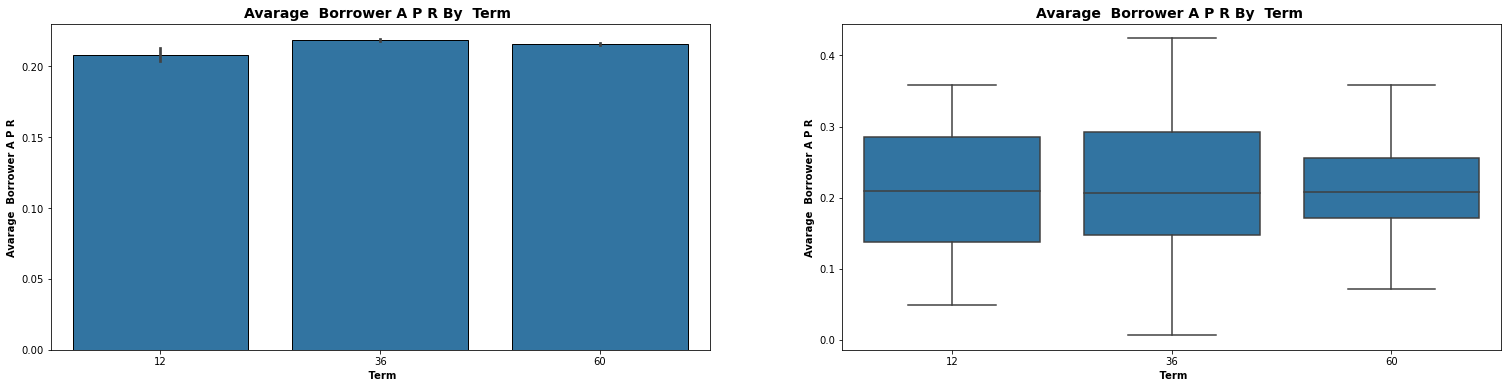

In [71]:
plt.figure(figsize=[26,6])

ax=plt.subplot(1,2,1)
MyBarPlot(df_c, 'Term','BorrowerAPR', ax=ax)

ax1=plt.subplot(1,2,2)
MyBoxPlot(df_c, 'Term','BorrowerAPR', ax=ax1)

The barplot and box plot shows Term have effect on Borrower Interest. A closer assessment of Term on Borrower APR, showed that average Borrower APR rates for borrowers who takes 12 month Term is lower than borrowers who take 36 and 60 months plans. The Borrower Rate, a 36 and 60 month Term would have a higher BorrowerRate than a loan of a 12 month Term.

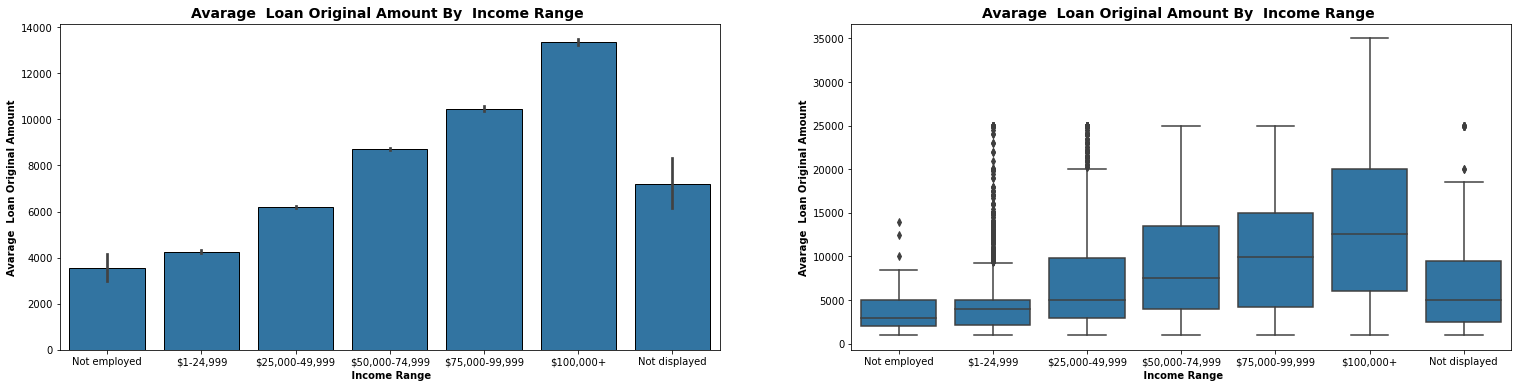

In [72]:
inrange=['Not employed', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+', 
        'Not displayed']
plt.figure(figsize=[26,6])

ax=plt.subplot(1,2,1)
MyBarPlot(df_c, 'IncomeRange','LoanOriginalAmount', order=inrange,ax=ax)


ax1=plt.subplot(1,2,2)
MyBoxPlot(df_c, 'IncomeRange','LoanOriginalAmount', order=inrange,ax=ax1)



The high income earners such as those who earn above `$100,000` got access to larger sizes of loans followed by those who earn between `$75,000-99,999`. On other hand low income earners such as those earning between `$1-$25,000` had access to the smallest size of loans. It seems the size of income is directly proportional to amount of loan that one can access the the higher the income the higher the loan that one can access, the lower the income the lower the loan that one can access.

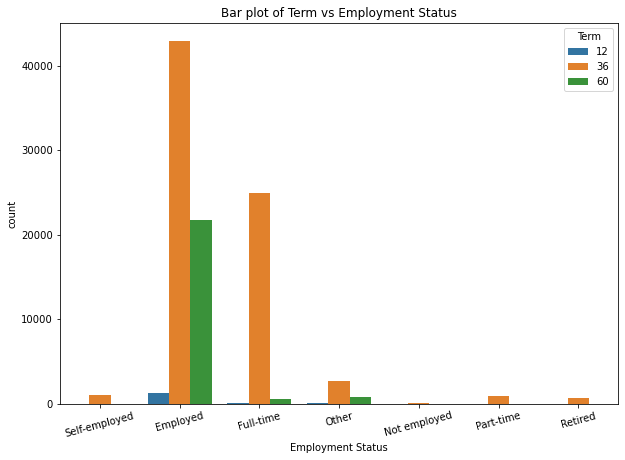

In [73]:
plt.figure(figsize=[10,7])
sb.countplot(data=df_c,  hue='Term', x='EmploymentStatus') #creating a boxplot for loan Term
plt.xlabel('Employment Status')
plt.xticks(rotation=15)
plt.title('Bar plot of Term vs Employment Status');

Employement status has no significant  effect on term of loan since most of the borrowers prefer 36 months plan irrespective of employment status. Most of the employed indivuals prefer 36 months term and some 60 months plan. Most of borrowers who take 36 months plan are those who are employed followed by full time and others.


## (Visualization 3)

### Multivariate Exploration


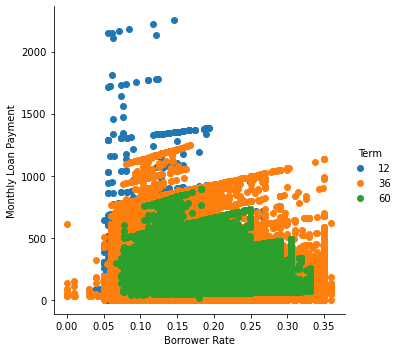

In [74]:
g = sb.FacetGrid(data = df_c, hue = 'Term', height = 5)
g.map(plt.scatter, 'BorrowerRate','MonthlyLoanPayment')
plt.xlabel('Borrower Rate')
plt.ylabel('Monthly Loan Payment');
g.add_legend();

The borrower rate seems to be negatively correlated with monthly loan payment. Borrowers who chose 12 months plan are making higher monthly loan payments and their rate of borrowing (The Borrower's interest rate for the loan) is also low (between 0.05 and 0.18). On other hand borrowes who take 36 months and 60 months term make lower monthly loan payments and their Borrower's interest rate for the loan is high. 

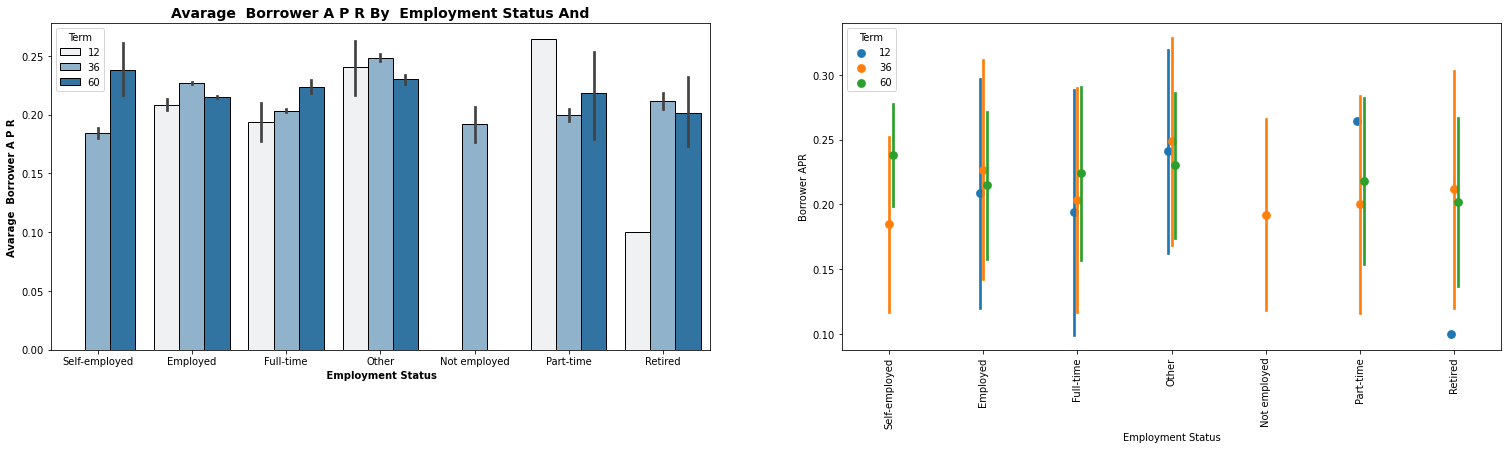

In [75]:
plt.figure(figsize=[26,6])

ax=plt.subplot(1,2,1)
MyBarPlot(df_c, 'EmploymentStatus','BorrowerAPR',hue='Term', ax=ax)
plt.subplot(1,2,2)
sb.pointplot(data=df_c, x='EmploymentStatus', y='BorrowerAPR',hue='Term',ci='sd',
             linestyles="", dodge=True)
plt.xticks(rotation=90);
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR');

Self-employed borrowers who took 60 months plan have highest average Borrower's Annual Percentage Rate (APR) compared to average borrower rate of employed, part-time, retired etc of the same plan.

Part-time borrowers have the highest 12 months term average borrower rate ompared to average Borrower's Annual Percentage Rate (APR) of employed, part-time, retired etc of the same plan.

Also the mean Borrower rate Self-employed borrowers who take 36 months term is the lowest compared average Borrower's Annual Percentage Rate (APR) of employed, part-time, retired etc of the same plan.

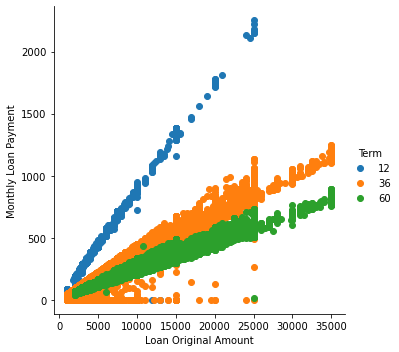

In [76]:
g = sb.FacetGrid(data = df_c, hue = 'Term', height = 5)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment')
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment');
g.add_legend();

There is positive correlation between Monthly Loan Payment and Loan Original Amount. Borrowers who took 12 months term loan pay more loan every month than those who took 36 and 60 months plan.

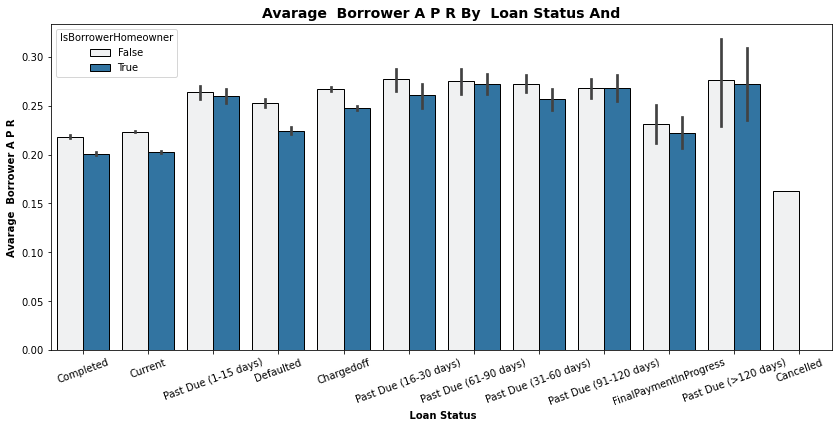

In [77]:
MyBarPlot(df_c, 'LoanStatus','BorrowerAPR',hue='IsBorrowerHomeowner')
plt.xticks(rotation=20);



IsBorrowerHomeowner variable affect the relationship between loan status and Borrower's Annual Percentage Rate (APR). It seems borrowers who have competed loan and the current have lower  Borrower's Annual Percentage Rate (APR) as compared to those who have defaulted. Homeowners borrowers who have completed,current and those who have defaulted their loans have lower borrower's annual percentage rate (APR) than those who are not homeowners.|

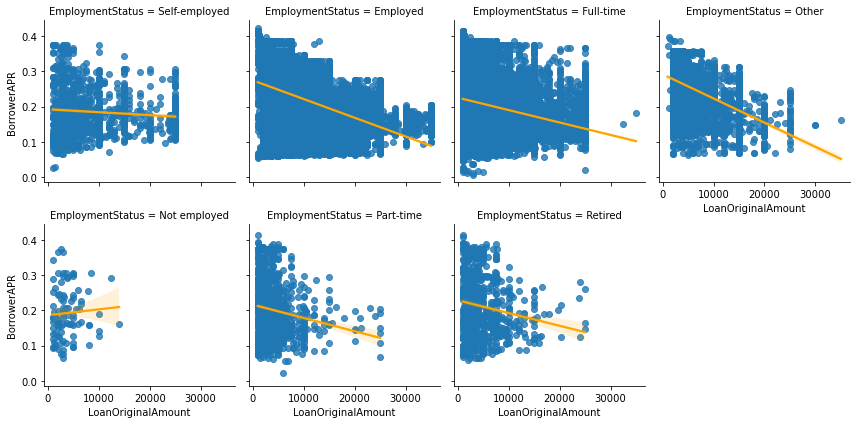

In [78]:
g = sb.FacetGrid(data = df_c, col = 'EmploymentStatus', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.03, line_kws = {'color':'orange'});

The employment status has impact on the correlation between the original loan amount and The Borrower's Annual Percentage Rate (APR) for the loan. There is strong negative correlation between the original loan amount and the Borrower's Annual Percentage Rate (APR) for employed, full-time borrowers while the others can be characterized as moderately negative. However borrowes who are not employed exhibit no correlation or weak positive correlation.

In [22]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
